In [1]:
import numpy as np
import sounddevice as sd
from matplotlib import pyplot as plt
from scipy import signal
import pyfar


from mestopy.mestopy import *


In [2]:
fs = 48000
a = MeasurementChain(fs, 1)

In [3]:
sig = pyfar.Signal([1, 0, 0, 0], fs)
a.add_ref(sig, calibration=1, device_name='Device 1', inverted=False)
a.add_ref(sig, calibration=1, device_name='Device 2', inverted=False)

a.ls_ref()
a.freq_resp()


freq domain energy Signal:
(1,) channels with 4 samples @ 48000 Hz sampling rate and unitary FFT normalization

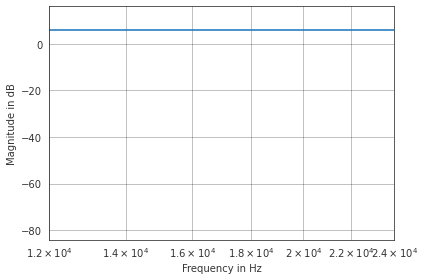

In [4]:
fig1 = pyfar.plot.line.freq(a.freq_resp())

DEMO 2: Devonvolution

In [2]:
print(sd.query_devices())

   0 HDA Intel PCH: CX20590 Analog (hw:0,0), ALSA (2 in, 4 out)
   1 HDA NVidia: HDMI 0 (hw:1,3), ALSA (0 in, 8 out)
   2 HDA NVidia: HDMI 0 (hw:1,7), ALSA (0 in, 2 out)
   3 HDA NVidia: HDMI 0 (hw:1,8), ALSA (0 in, 8 out)
   4 HDA NVidia: HDMI 0 (hw:1,9), ALSA (0 in, 8 out)
   5 Steinberg UR22: USB Audio (hw:2,0), ALSA (2 in, 2 out)
   6 sysdefault, ALSA (128 in, 128 out)
   7 front, ALSA (0 in, 4 out)
   8 surround40, ALSA (0 in, 4 out)
   9 surround51, ALSA (0 in, 4 out)
  10 surround71, ALSA (0 in, 4 out)
  11 samplerate, ALSA (128 in, 128 out)
  12 speexrate, ALSA (128 in, 128 out)
  13 pulse, ALSA (32 in, 32 out)
  14 upmix, ALSA (8 in, 8 out)
  15 vdownmix, ALSA (6 in, 6 out)
  16 dmix, ALSA (0 in, 2 out)
* 17 default, ALSA (32 in, 32 out)


In [3]:
sd.default.device = 5
sd.default.channels = 2

In [4]:
# Parameter für Sweep definieren
gain = 0.1
fs = 48000
T = 2
f_min = 10
f_max = 22000

# Zeitvektor definieren
t = np.arange(0, int(T*fs)) / fs

In [5]:
# Sweep erzeugen
x_sweep = signal.chirp(t, f0=f_min, f1=f_max, t1=T, method='logarithmic', phi=90)

# Nullen anhängen
x_sweep = np.concatenate((x_sweep, np.zeros(int(len(t) / 2))))

# neuen Zeitvektor für verlängertes Signal definieren
t = np.arange(0, int(len(x_sweep))) / fs

# Sweep auf gain normalisieren
x_sweep = np.array((x_sweep/max(abs(x_sweep)))*gain)
x_sweep = np.array((x_sweep, x_sweep)).T

In [6]:
# Sweep abspielen und gleichzeitig aufnehmen
meas = sd.playrec(x_sweep, samplerate=fs)
sd.wait()

<sounddevice.CallbackFlags: input overflow, output underflow>

In [7]:
# Aufgenommene Sweeps in pyfar.Signal Objekte übergeben; Aufnahme aufteilen: Kanal 1 = Messung, Kanal 2 = Referenzmessung
x_ref = pyfar.Signal(meas[:,1], fs, signal_type='energy')
x_dut = pyfar.Signal(meas[:,0], fs, signal_type='energy')

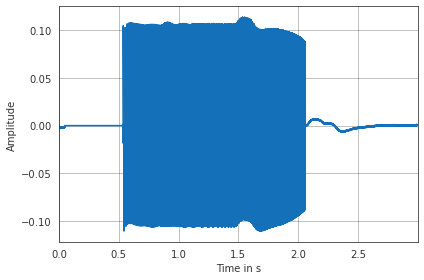

In [8]:
# Referenzmessung im Zeitbereich plotten
fig2 = pyfar.plot.line.time(x_ref)

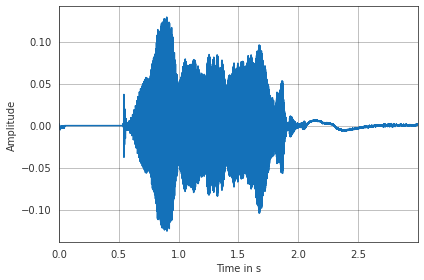

In [9]:
# DUT-Output im Zeitbereich plotten
fig3 = pyfar.plot.line.time(x_dut)

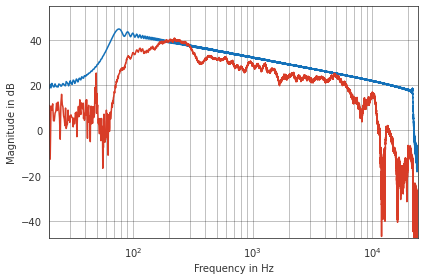

In [10]:
# Referenzmessung und DUT-Output im Frequenzbereich plotten
fig4 = pyfar.plot.line.freq(x_ref)
fig5 = pyfar.plot.line.freq(x_dut)

In [17]:
# Entfaltung
H = pyfar.meas.deconv(x_dut, x_ref)


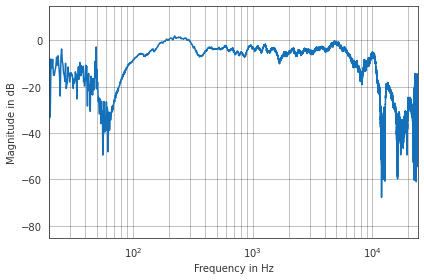

In [18]:
# Ergebnis der Entfaltung im Frequenzbereich plotten
fig6 = pyfar.plot.line.freq(H)

(0.0, 0.04)

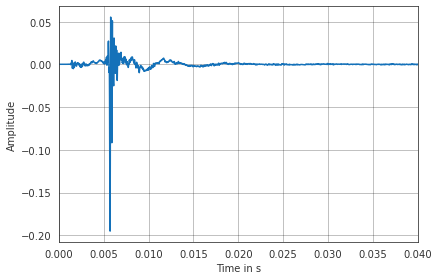

In [19]:
# Impulsantwort plotten
fig6 = pyfar.plot.line.time(H)
fig6.set_xlim([0, 0.04])

NameError: name 'pyfar' is not defined